# Clustering
----

The insight gained from the previous multivariate linear regression models along with ridge and lasso regressions helped us understand that a predictor variable with a high(low) correlation value does not necessarily equate to it being a reliable or robust predictor when used to predict the number of likes per post. Although comments had lower correlation with likes compared to followers, it did seem to play a major role in predicting likes when studied using the multivariate regression models. This idea can bu further understood with the help of clustering.

Clustering is a type of unsupervised learning that helps in grouping a given set of data based on the distance between them (whichever data is more similar to each other are grouped together). Clustering this data set (fashiondata) with respect to the four brand categories can help give an insight into how the marketing strategies can be tailored or improvised when branding on social media.

In this analysis, a clustering algorithm (like K-means) is used to group the given data based on their features. Later, the results will be evaluated on how the data set is grouped and how they can be related to the response variable likes.

Clustering is useful for analysing this fashion dataset as it may offer strategic insights on how the posts or characteristics of the account could be modified to maximise the users' attention, this can be studied using the metric 'Likes' which is an engagement metric itself.

For the simplicity of the analysis, the predictor variables 'followers' and 'comments' will be used alongside 'likes' to study the clustering model.

This clustering can help understand the interaction between high engagement(likes) and high reach(followers) of social media posts pertaining to online marketing

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

A value of 2 is chosen for clustering in this case. This is found with the Elbow method. In this method the sum of the squared distances of the samples to their closest cluster are plotted. Then, a sharp shift or decrease is observed in the graph at a point which is taken as a value 2 in our case. This point suggests a good balance between the scenario of having too many or too less clusters.


The K-means algorithm will be used to partition the dataset into 2 clusters. Each of the clusters can then be analysed to obtain meaningful insights on how each group can be distinguished based on its characteristic.

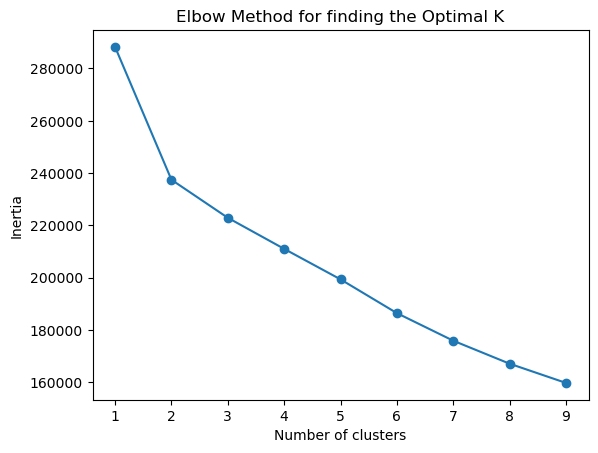

In [39]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for finding the Optimal K')
plt.show()

---

## Highstreet

          Followings    Followers   MediaCount       Likes  Comments   \
Cluster                                                                 
0        1373.782033  8896.542479  3902.746866  125.357242   4.130571   
1        1862.857635  8136.838676  2894.622199   74.304378   2.198552   

         CreationTime    Selfie  BodySnap  Marketing  ProductOnly  ...  \
Cluster                                                            ...   
0        1.453870e+09  0.086586  0.659868   0.219903     0.013275  ...   
1        1.453869e+09  0.004077  0.121365   0.043807     0.569018  ...   

         NumberOfPeople  NumberOfFashionProduct     Anger  Contempt   Disgust  \
Cluster                                                                         
0              1.257100                3.991225  0.002317  0.004141  0.000869   
1              0.374776                2.339292  0.000031  0.000083  0.000007   

             Fear  Happiness   Neutral   Sadness  Surprise  
Cluster                 

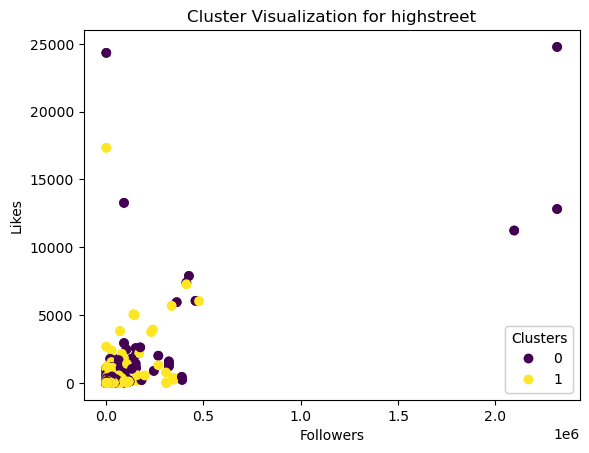

In [44]:
cluster_data = 'fashiondata.csv'
cluster_fashion_data = pd.read_csv(cluster_data)
highstreet_cluster = cluster_fashion_data[fashion_data['BrandCategory'] == 'High street']


#the following code is to help deal with only numerical values and adjust accordingly to any missing values
highstreet_cluster_num = highstreet_cluster.select_dtypes(include=[np.number])
highstreet_cluster_num = highstreet_cluster_num.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(highstreet_cluster_num)
#scaling of data is done above to prevent skewing the data values

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
highstreet_cluster_num['Cluster'] = clusters
cluster_means = highstreet_cluster_num.groupby('Cluster').mean()

print(cluster_means)
plt.scatter(highstreet_cluster_num['Followers'], highstreet_cluster_num['Likes'], c=highstreet_cluster_num['Cluster'])
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Cluster Visualization for highstreet')

scatter = plt.scatter(highstreet_cluster_num['Followers'], highstreet_cluster_num['Likes'], c=highstreet_cluster_num['Cluster'], cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

### Analysis of High Street clustering

In each of the 2 clusters found, the mean(average) of each feature per cluster is printed above with respect to the Highstreet brand category. Clusters can help understand which type of content could possibly be present in our data, for instance, high engagement or high reach.

Cluster 0:
This cluster has a moderately high average 'followers' of 8896 and a moderate value of average for 'likes' which is 125. This cluster can be associated with well-know(well-established) profiles that have a decent and consistent engagement with their audience. The high values of comments indicate the significant amount of interaction occuring between the users, showing greater engagement with the post.

Cluster 1:
Compared to cluster 0, this has slightly fewer followers of 8136, significantly fewer likes of 74 and also fewer comments of 2.20, indicating the profiles making the post having less engagement and visibility amongst the target audience. This shows the need for profiles in cluster 1 to enhance the interaction with their target audience as an improvisation to their branding strategy.

---

## Small couture

          Followings     Followers   MediaCount       Likes  Comments   \
Cluster                                                                  
0        1136.874421  25770.115789  2388.253740  226.127424   3.196676   
1        2559.077759  12677.695344  6550.517608   73.303238   1.864807   

         CreationTime    Selfie  BodySnap  Marketing  ProductOnly  ...  \
Cluster                                                            ...   
0        1.451295e+09  0.056118  0.556318   0.325292     0.024835  ...   
1        1.449876e+09  0.002467  0.165584   0.052792     0.680414  ...   

         NumberOfPeople  NumberOfFashionProduct     Anger  Contempt   Disgust  \
Cluster                                                                         
0              1.431305                5.115628  0.006973  0.004629  0.000786   
1              0.380297                3.074059  0.000053  0.000056  0.000009   

             Fear  Happiness   Neutral   Sadness  Surprise  
Cluster             

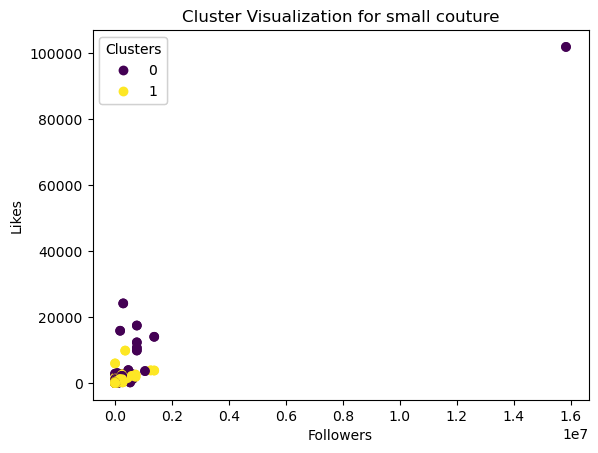

In [45]:
cluster_data = 'fashiondata.csv'
cluster_fashion_data = pd.read_csv(cluster_data)
smallcouture_cluster = cluster_fashion_data[fashion_data['BrandCategory'] == 'Small couture']


#the following code is to help deal with only numerical values and adjust accordingly to any missing values
smallcouture_cluster_num = smallcouture_cluster.select_dtypes(include=[np.number])
smallcouture_cluster_num = smallcouture_cluster_num.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(smallcouture_cluster_num)
#scaling of data is done above to prevent skewing the data values

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
smallcouture_cluster_num['Cluster'] = clusters
cluster_means = smallcouture_cluster_num.groupby('Cluster').mean()

print(cluster_means)
plt.scatter(smallcouture_cluster_num['Followers'], smallcouture_cluster_num['Likes'], c=smallcouture_cluster_num['Cluster'])
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Cluster Visualization for small couture')

scatter = plt.scatter(smallcouture_cluster_num['Followers'], smallcouture_cluster_num['Likes'], c=smallcouture_cluster_num['Cluster'], cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

### Analysis of Small Couture clustering

In each of the 2 clusters found, the mean(average) of each feature per cluster is printed above with respect to the small couture brand category.

Cluster 0:
This cluster has a high number of 'followers' of 25,770 and a high 'likes' which is 226. These two high values can be associated with well-know(well-established) profiles that have a very significant reach and great presence and engagement with their target audience. The high comments value of 3.20 compared to cluster 1 is indicative of this strong bond with users' in terms of interaction.

Cluster 1:
Unlike cluster 0, this has lower followers of 12,677 and significantly fewer likes of 73, indicating the profiles making the post having less engagement and visibility amongst the target audience. The comments are also low with a mean value of 1.86. This shows a possibility where the audience might have not been targeted well or are still not able to be interacted with properly for getting a good out-reach of their posts. They can diversify their marketing methods to reach a wider range of audience and their level of engagement with the audience to have an impact on social media with their post.

---

## Mega couture

          Followings    Followers   MediaCount       Likes  Comments   \
Cluster                                                                 
0        2707.197264  6237.226062  4335.778978   30.550036   0.930166   
1        1231.974359  9700.675214  2394.741453  100.138889   2.495726   

         CreationTime    Selfie  BodySnap  Marketing  ProductOnly  ...  \
Cluster                                                            ...   
0        1.453868e+09  0.002271  0.046033   0.027906     0.752278  ...   
1        1.453868e+09  0.121702  0.509732   0.288912     0.013743  ...   

         NumberOfPeople  NumberOfFashionProduct     Anger  Contempt   Disgust  \
Cluster                                                                         
0              0.278244                2.193846  0.000006   0.00007  0.000018   
1              1.585166                4.062313  0.002461   0.00701  0.001376   

             Fear  Happiness   Neutral   Sadness  Surprise  
Cluster                 

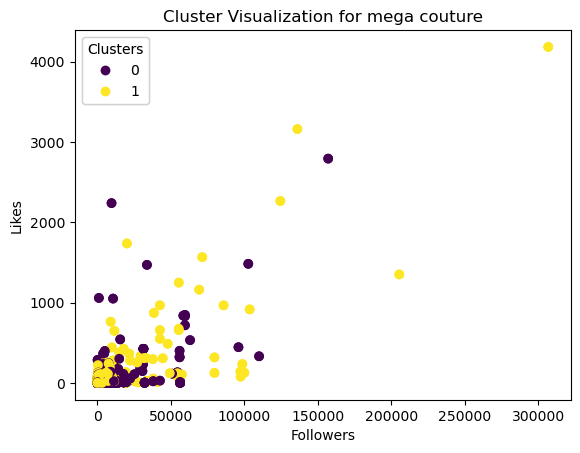

In [46]:
cluster_data = 'fashiondata.csv'
cluster_fashion_data = pd.read_csv(cluster_data)
megacouture_cluster = cluster_fashion_data[fashion_data['BrandCategory'] == 'Mega couture']


#the following code is to help deal with only numerical values and adjust accordingly to any missing values
megacouture_cluster_num = megacouture_cluster.select_dtypes(include=[np.number])
megacouture_cluster_num = megacouture_cluster_num.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(megacouture_cluster_num)
#scaling of data is done above to prevent skewing the data values

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
megacouture_cluster_num['Cluster'] = clusters
cluster_means = megacouture_cluster_num.groupby('Cluster').mean()

print(cluster_means)
plt.scatter(megacouture_cluster_num['Followers'], megacouture_cluster_num['Likes'], c=megacouture_cluster_num['Cluster'])
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Cluster Visualization for mega couture')

scatter = plt.scatter(megacouture_cluster_num['Followers'], megacouture_cluster_num['Likes'], c=megacouture_cluster_num['Cluster'], cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

### Analysis of Mega Couture clustering

In each of the 2 clusters found, the mean(average) of each feature per cluster is printed above with respect to the mega couture brand category.

Cluster 0:
This cluster has posts that have received significantly lower engagement from the audience with respect to the fewer followers count of 6,237 and very low likes per post of 30.55. The extremely low levels of comments of 0.93 supports this idea further. In addition, the significantly high media count value of 4336 suggests how the content may not resonate well with the audience despite having many people view the particular post. This suggests the need for these profiles to make improvisations to their marketing strategy to popularize their post on social media.

Cluster 1:
This cluster has higher followers of 9,701 and significantly higher likes of 100.14, indicating the profiles making the post having an effective strategy that has helped them make their post both engaging and out-reaching amidst the audience unlike cluster 0 data. The higher comments value of 2.50 compared to cluster 0 is further supportive of this suggestion.

---

## Designer

          Followings     Followers   MediaCount       Likes  Comments   \
Cluster                                                                  
0        1701.744520   7841.954346  2826.284807   59.227211   2.044898   
1        1015.150302  17650.872512  1834.612615  165.594945   4.658242   

         CreationTime    Selfie  BodySnap  Marketing  ProductOnly  ...  \
Cluster                                                            ...   
0        1.453755e+09  0.003487  0.096196   0.045134     0.639718  ...   
1        1.453711e+09  0.088399  0.650434   0.224163     0.017164  ...   

         NumberOfPeople  NumberOfFashionProduct     Anger  Contempt   Disgust  \
Cluster                                                                         
0              0.358276                2.370290  0.000173  0.000029  0.000008   
1              1.337370                4.390012  0.005259  0.004743  0.001174   

             Fear  Happiness   Neutral   Sadness  Surprise  
Cluster             

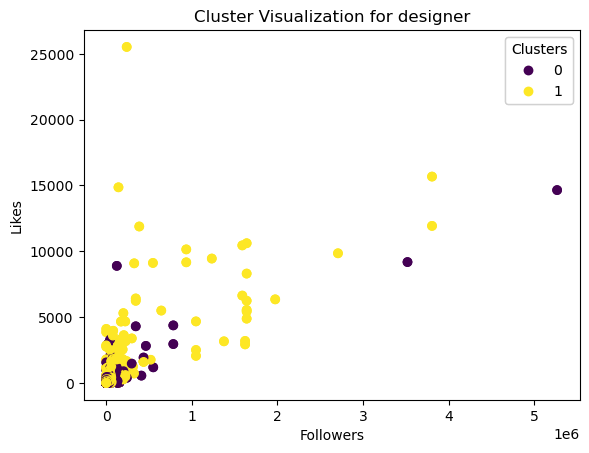

In [47]:
cluster_data = 'fashiondata.csv'
cluster_fashion_data = pd.read_csv(cluster_data)
designer_cluster = cluster_fashion_data[fashion_data['BrandCategory'] == 'Designer']


#the following code is to help deal with only numerical values and adjust accordingly to any missing values
designer_cluster_num = designer_cluster.select_dtypes(include=[np.number])
designer_cluster_num = designer_cluster_num.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(designer_cluster_num)
#scaling of data is done above to prevent skewing the data values

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
designer_cluster_num['Cluster'] = clusters
cluster_means = designer_cluster_num.groupby('Cluster').mean()

print(cluster_means)
plt.scatter(designer_cluster_num['Followers'], designer_cluster_num['Likes'], c=designer_cluster_num['Cluster'])
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Cluster Visualization for designer')

scatter = plt.scatter(designer_cluster_num['Followers'], designer_cluster_num['Likes'], c=designer_cluster_num['Cluster'], cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

### Analysis of Designer clustering

In each of the 2 clusters found, the mean(average) of each feature per cluster is printed above with respect to the designer brand category.

Cluster 0:
Cluster 0 has a high followers count of 7842 indicating good audience-engagement. It has relatively lower likes per post of 59 suggesting how it might not have been resonating well with its audience despite its reach. The lower comments level of 2.04 further supports this idea, suggesting the need for improving the profile's branding strategy to create an impact on its audience.

Cluster 1:
This cluster has a significantly higher follower count of 17,651 when compared to cluster 0. This proves its wide-reaching audience level and effective strategy. The higher likes of 166 and higher average comments of 4.66 further supports this idead by suggesting the increased level in user-engagement and usage of this post on social media.

---

## Conclusion: insights gained from clustering

Clustering the data under four brand categories helped us realise that even though comments have lower correlations with like sin comparison to followers, both comments and likes aligned on the same track when seen from the perspective of "user-engagement", whereas the number of followers highly indicated the "user-reach". As observed, whenever a cluster is found to have a higher number of followers, it was not necessary to see a high number of likes in that cluster. However, whenever the number of likes were high, it was seen that the number of comments received by the posts in that cluster were also high in most of the clusters under all the four brand categories. This suggested the use of comments as a better predictor when studying the variable likes in comparison to followers.